### Ploting Normal PDF

2000


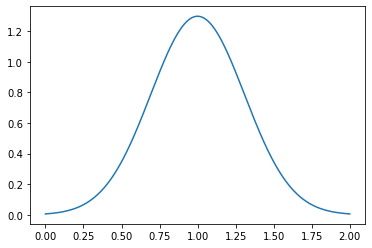

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Plot between -10 and 10 with .001 steps.
ts = 2
x_axis = np.arange(0, ts, 0.001)

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# print(mean)

# sd = statistics.stdev(x_axis)
sd = ts/6.5

tt = norm.pdf(x_axis, mean, sd) * x_axis
print(len(tt))
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

### Testing the Scipy Integrate Function

In [8]:
import scipy.integrate as integrate
# result = integrate.quad(lambda x: norm.pdf(x, mean, sd), 0, 2)
result = integrate.quad(lambda x: ((1/(sd * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2*sd**2))), 0, 2)
result

(0.998845932501836, 1.9129275190244398e-14)

### My Custom Integration Function (Very Slow)

In [9]:
# dx = ts / 1e6
# print(dx)
# t = []
# for i in range(1, 1000001):
#     t.append(dx * norm.pdf(i * dx, mean, sd))

# print(np.array(t).sum())

### Speed Routine

In [10]:
expedient_number_of_speed_request = 10
true_number_of_speed_requests = expedient_number_of_speed_request + 2 # adding 2 because of appended and prepended 0 to the final routine

ti = ts / true_number_of_speed_requests
average_velocity = 0.55

# request_number = 20
requested_speeds = []
for i in range(1, true_number_of_speed_requests - 1):
    requested_speeds.append(ti * norm.pdf(i * ti, mean, sd) * average_velocity)
print('req len: ', len(requested_speeds))
individual_requested_speeds = np.array(requested_speeds)

utilized_average_speed = individual_requested_speeds.sum()
# print('utilized avg speed: ', utilized_average_speed)

error = average_velocity - utilized_average_speed
# print('error: ', error)

individual_request_deficit = error / expedient_number_of_speed_request
# print('individual req deficit: ', individual_request_deficit)

corrected_requested_speeds = individual_requested_speeds + individual_request_deficit
# print('corrected requested avg speed: ', corrected_requested_speeds.sum())

final_speed_routine = list(corrected_requested_speeds)
final_speed_routine.append(0)
final_speed_routine.insert(0, 0)
print('final_routine: ', final_speed_routine)
print('final_routine_length: ', len(final_speed_routine))
print('final_routine_aggregate: ', np.array(final_speed_routine).sum())

# print(ti * norm.pdf(request_number * ti, mean, sd) * average_velocity)

req len:  10
final_routine:  [0, 0.0034919987618894353, 0.011849599289013215, 0.032266629178198176, 0.06665304403823472, 0.1031679407144674, 0.11929461998883766, 0.10298726149053508, 0.06642034018783576, 0.03209900483453355, 0.011769561516455104, 0]
final_routine_length:  12
final_routine_aggregate:  0.55


In [11]:
class VelocityDirectionError(Exception('Velocity direction is incorrect')):
    def __init__(self, *args: object) -> None:
        super().__init__(*args)

print(np.abs(-3))

3
